## House Price Predictor 


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("Book1.csv") #reading data

In [3]:
housing.head() #quick look at data , display first 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info() #shows information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CRIM'].value_counts() #show value count for a particular column

0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: CRIM, Length: 504, dtype: int64

In [6]:
housing.describe() #shows various statistics about data 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287689,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

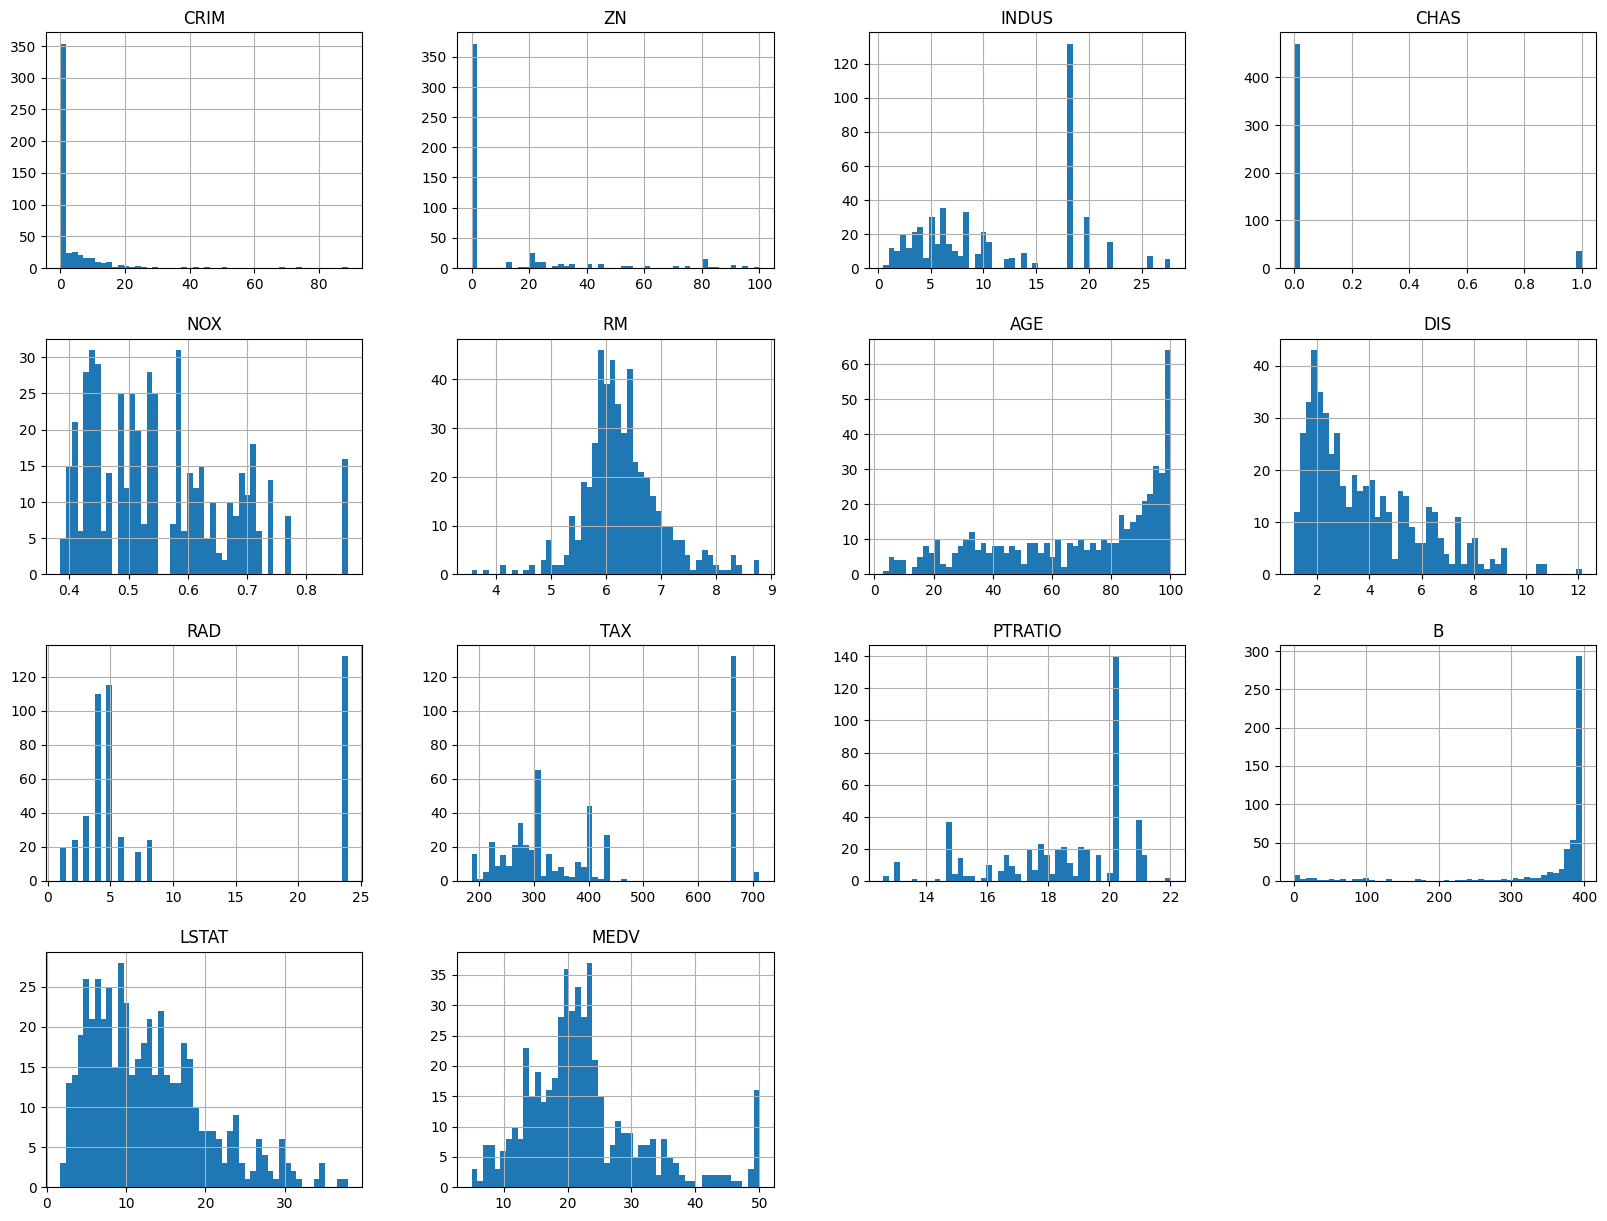

In [9]:
housing.hist(bins=50,figsize=(20,15)) #plot histogram

## Train-Test Splitting

In [10]:
'''import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42) #fix test set for all times , we have to fix it because random data will make all values visible
    shuffled=np.random.permutation(len(data)) #shuffle length of data
    test_set_size=int( len(data) * test_ratio) #test ratio tells how much data is being splitted to train 
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]'''
from sklearn.model_selection import train_test_split 
train_set, test_set=train_test_split(housing,test_size=0.2,random_state=42) #data,test_ratio,random_seed
print(len(test_set))
print(len(train_set))

102
404


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit #we need to perform strat shuffle because model needs to be trained on all possible values
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [12]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282703,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714889,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.880000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


## Looking for Correlations 

In [13]:
corr_matrix = housing.corr() #finding any correlations if any 

In [14]:
corr_matrix['MEDV'].sort_values(ascending=False) #calculating pearson value for medv , +1=high +ve correlation ,-1=-ve correlation

MEDV       1.000000
RM         0.694493
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

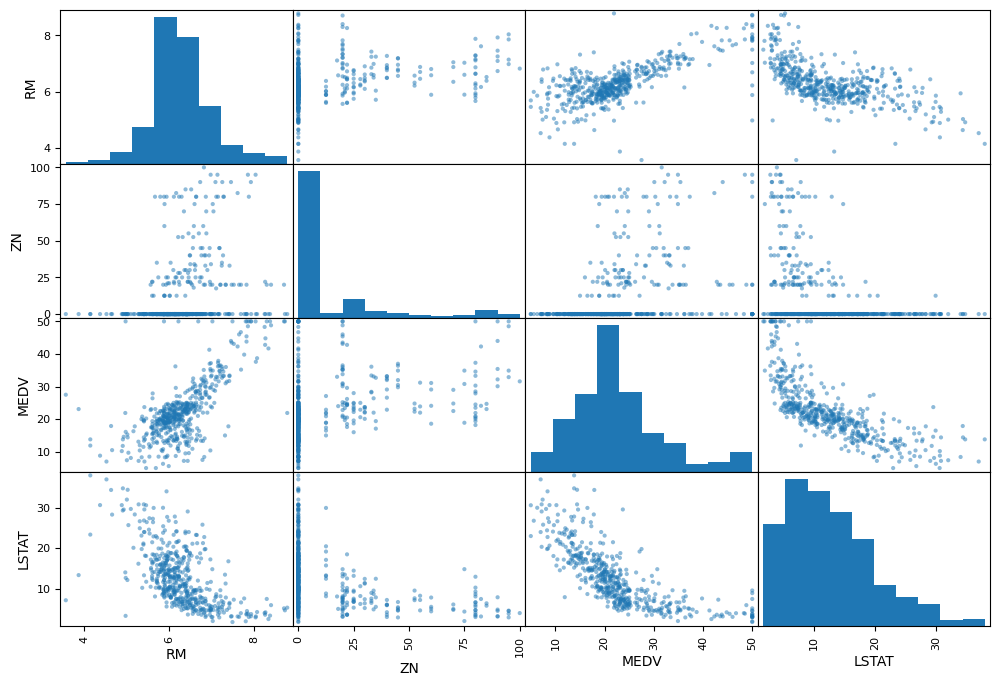

In [15]:
from pandas.plotting import scatter_matrix #plotting high correlation attributes using pandas plotting
attributes = ["RM","ZN","MEDV","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))
#correlation matrix is used to identify outliers(unnecessary data) and remove them

<Axes: xlabel='RM', ylabel='MEDV'>

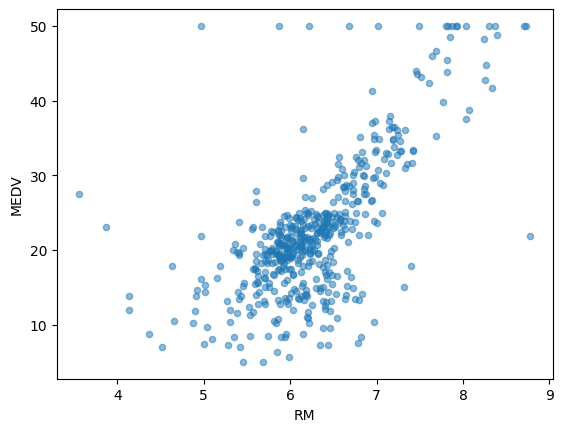

In [16]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.5) #alpha decides color according to density

## trying out attribute combinatios

<Axes: xlabel='taxrm', ylabel='MEDV'>

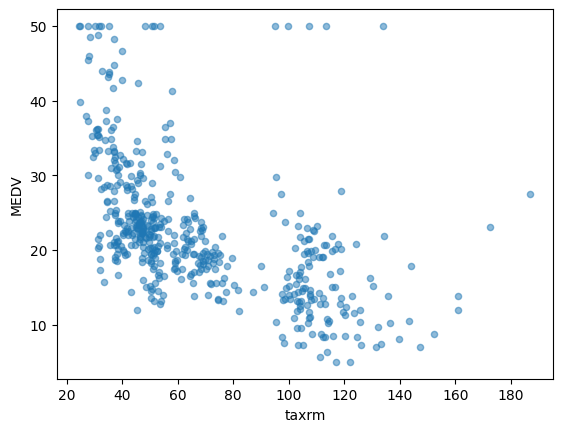

In [17]:
housing['taxrm']=housing['TAX']/housing['RM'] #adding new attribute to dataset using pandas 
housing.plot(kind="scatter",x="taxrm",y="MEDV",alpha=0.5)

In [18]:
housing = strat_train_set.drop("MEDV",
                               axis=1)
housing_label=strat_train_set["MEDV"].copy()

## missing attributes

In [19]:
#to take care of missing attributes - 1)get rid of missing datapoints,2)get rid of full column,3)set missing values to some values
#a=housing.dropna(subset="RM") # 1) 
#b=housing.drop("RM",axis=1) # 2)
median = housing["RM"].median()
housing["RM"].fillna(median) # 3) 

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [20]:
from sklearn.impute import SimpleImputer #imputer will replace all null values in training and test data set with median and will do it for all new values 
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [21]:
X=imputer.transform(housing) #replacing value for all columns if any na , automated 
housing_tr=pd.DataFrame(X,columns=housing.columns) #making new dataframe
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282208,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712246,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit_learn design 

In [22]:
#objects in scikit_learn - 
#1)estimators(eg. imputer) - has fit and transform method 
#fit method - fit dataset and calculate internal parametres 
#2)transformers
#transform method takes input and returns output based on learnings from fit() , also has convinience function called fit_transform() that fits and then transorm
#3)predictors - linear regression model , fit() and predict() are two common functions , also give score function and evaluate the functions 


## feature scaling 

In [23]:
#feature scaling will make all values in same range i.e. scale them 
#two types of feature scaling - 
#1)min-max scaling or normalization((value-min)/(max-min))
#sklearn provides class called MinMaxScalar for this
#2)standardization (value-min)/std
#sklearn provides class called as Standard Scalar for this


## creating pipeline 

In [24]:
#creating pipeline
#pipeline allows data/model to be updated in future in an easy manner 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
('imputer',SimpleImputer(strategy='median')),('std_scaler',StandardScaler()),
])


In [25]:
 housing_num_tr=my_pipeline.fit_transform(housing) #housing_num_tr is numpy array here 

## Selecting a desired model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression() 
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_label)

RandomForestRegressor()

In [27]:
some_data=housing.iloc[:5]
some_labels=housing_label.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.39 , 25.6  , 16.566, 23.483, 23.556])

## evaluating the model

In [28]:
#linearRegression model is having bad predictions as mse is 23% i.e. very large 
#In DecisionTreeRegressor model error comes out zero because it has done overfitting 
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_label,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_mse
lin_rmse

1.2076292676230564

## using better evaluation technique - cross validation 

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_label,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

In [30]:
rmse_scores

array([2.83108644, 2.79905017, 4.24772369, 2.59029883, 3.42013692,
       2.70458533, 4.75870989, 3.43369444, 3.44226686, 3.09965759])

In [31]:
def print_scores(scores): 
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Std:",scores.std())
print_scores(rmse_scores)

Scores: [2.83108644 2.79905017 4.24772369 2.59029883 3.42013692 2.70458533
 4.75870989 3.43369444 3.44226686 3.09965759]
Mean: 3.3327210153614857
Std: 0.6661093859665913


## using joblib to save the ML model

In [32]:
from joblib import dump,load
dump(model,'houseprice.joblib')

['houseprice.joblib']

## testing model on test data

In [37]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set['MEDV'].copy() 
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[24.527 11.678 25.903 21.68  18.536 15.027 20.029 14.943 31.659 40.415
 19.539 12.136 25.066 27.847 19.479 10.771 31.304 14.676 23.715 18.672
 19.704 17.526 18.149 22.038 19.099 30.91  16.301 32.714  8.621 33.574
 23.795 21.581 22.606 11.494 21.222 11.454 43.687 24.657 23.015 41.85
 23.826 29.386 20.085 20.696 19.086 33.651 44.767 19.864 20.149 21.532
 21.41  15.764 21.436 15.308 24.778 33.728 42.41  25.512 19.658 20.874
 46.439  9.534 19.163 25.153 15.071 33.067 19.886 18.257 19.53  34.746
 25.775 22.712 21.364 22.071 34.743 12.717 15.801 20.283 20.565 21.374
 22.462 21.34  13.9   22.637 20.33  21.085 13.506 20.897 21.777 23.204
 18.624 26.82   6.977 25.844 18.69  29.13  19.876 30.895 14.876 26.882
 21.193 20.359] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [38]:
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.2448928 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.4959375 , -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28366923,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13184822, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.04188022, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

## using the model

In [40]:
from joblib import dump,load 
import numpy as np
model=load('houseprice.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.2448928 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.39])